Well use a GenericCascadeCase and we will load the example dataset, generated with OpenFOAM.
We don't necessarily need a complete dataset for postprocessing procedures.

In [10]:
from ntrfc.cascade_case.solution import GenericCascadeCase
import pyvista as pv
import importlib.resources


pv.set_jupyter_backend('trame')

inlet_path =  importlib.resources.files("ntrfc") / "data/openfoam_cascade_case/boundary/inlet.vtp"
outlet_path = importlib.resources.files("ntrfc") / "data/openfoam_cascade_case/boundary/outlet.vtp"
blade_path = importlib.resources.files("ntrfc") / "data/openfoam_cascade_case/boundary/blade_wall.vtp"
fluid_path = importlib.resources.files("ntrfc") / "data/openfoam_cascade_case/internal.vtu"

case = GenericCascadeCase()

case.read_meshes(inlet_path,"inlet")
case.read_meshes(outlet_path,"outlet")
case.read_meshes(blade_path,"blade")
case.read_meshes(fluid_path,"fluid")


In [11]:

case.set_active_blade_slice()
case.compute_domainparams_from(0.01)

ratio of cleaned sites: 0.8360508152445734


0

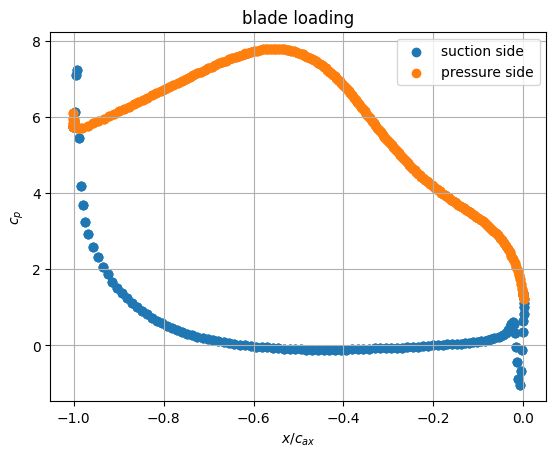

In [12]:
case.blade_loading(pressurevar="p", densityvar="rho", velvar="U")

In [13]:
avdr =case.compute_avdr_inout_massave(densityvar="rho", velvar="U")
print(avdr)


2.6096421199420345
